#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [40]:
# Read CSV
df = pd.read_csv('https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [41]:
df.duplicated().any()

True

In [42]:
df = df.drop_duplicates()

Periksa apakah ada missing values

In [43]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          5.010417     3.431250      1.462500     0.250000
versicolor      5.936000     2.770000      4.260000     1.326000
virginica       6.604082     2.979592      5.561224     2.028571


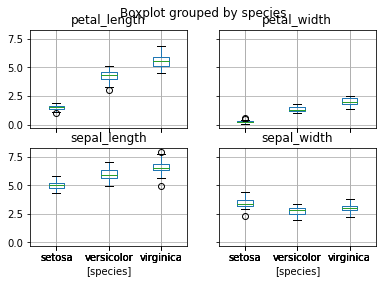

In [44]:
data1 = df.groupby(['species']).mean()
boxplot = df.boxplot(by="species")
print(data1)

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [45]:
X = df.drop(columns=['species'])
y = df[['species']]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [47]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [48]:
log = LogisticRegression(random_state = 1)
log.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=1)

Uji model dengan dataset test

In [49]:
y_pred = log.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'virginica' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'virginica' 'versicolor' 'versicolor']


In [50]:
confusion = confusion_matrix(y_pred, y_test)
print(confusion)
print("Accuracy Score :", accuracy_score(y_test, y_pred))

[[1 0 0]
 [0 7 1]
 [0 2 4]]
Accuracy Score : 0.8


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [51]:
gnb = GaussianNB()
gnb

GaussianNB()

In [52]:
classifier = gnb.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Uji hasil model dengan data test

In [53]:
y_pred = gnb.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'virginica' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [54]:
confusion = confusion_matrix(y_pred, y_test)
print(confusion)
print("Accuracy Score :", accuracy_score(y_test, y_pred))

[[1 0 0]
 [0 8 1]
 [0 1 4]]
Accuracy Score : 0.8666666666666667


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [55]:
log = KNeighborsClassifier(metric='euclidean')
log

KNeighborsClassifier(metric='euclidean')

In [56]:
log.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [57]:
y_pred = log.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'virginica' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'virginica' 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [58]:
confusion = confusion_matrix(y_pred, y_test)
print(confusion)
print("Accuracy Score :", accuracy_score(y_test, y_pred))

[[1 0 0]
 [0 7 1]
 [0 2 4]]
Accuracy Score : 0.8


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah Naive Bayes